In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point
import seaborn as sns


divvydata = pd.read_csv('divvydata.csv') #original data set

print("Number of rows ", len(divvydata.index)) #length of index

row_count, column_count = divvydata.shape #column and row count

print("Number of rows ", row_count)
print("Number of columns ", column_count)

Number of rows  1048575
Number of rows  1048575
Number of columns  25


In [2]:
filename = "divvydata.csv"
n = sum(1 for line in open(filename))-1 #number of records in file
s = n//10  #sample size of 10%

skip = sorted(random.sample(range(1, n+1), n-s)) # n+1 to compensate for header
df = pd.read_csv(filename, skiprows=skip)
df.to_csv('divvysample.csv', index=False) #store sample data in this file

In [3]:
divvysample = pd.read_csv('divvysample.csv') #sample data set

print("Number of Sample Rows ", len(divvysample.index)) #length of sample

divvysample.dtypes

Number of Sample Rows  104857


trip_id                int64
year                   int64
month                  int64
week                   int64
day                    int64
hour                   int64
usertype              object
gender                object
starttime             object
stoptime              object
tripduration         float64
temperature          float64
events                object
from_station_id        int64
from_station_name     object
latitude_start       float64
longitude_start      float64
start_coordinates     object
dpcapacity_start       int64
to_station_id          int64
to_station_name       object
latitude_end         float64
longitude_end        float64
stop_coordinates      object
dpcapacity_end         int64
dtype: object

In [4]:
divvysample.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,latitude_start,longitude_start,start_coordinates,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,stop_coordinates,dpcapacity_end
0,2355079,2014,6,27,0,21,Subscriber,Male,6/30/2014 21:45,6/30/2014 21:56,...,41.896910,-87.621743,"41.89691, -87.621743",15,74,Kingsbury St & Erie St,41.893843,-87.641851,"41.89384315, -87.64185116",23
1,2355075,2014,6,27,0,21,Subscriber,Male,6/30/2014 21:44,6/30/2014 22:07,...,41.926277,-87.630834,"41.926277, -87.630834",15,294,Broadway & Berwyn Ave,41.978353,-87.659753,"41.978353, -87.659753",15
2,2355055,2014,6,27,0,21,Subscriber,Male,6/30/2014 21:37,6/30/2014 21:45,...,41.912202,-87.634664,"41.912202, -87.634664",19,337,Clark St & Chicago Ave,41.896544,-87.630931,"41.896544, -87.630931",19
3,2354970,2014,6,27,0,21,Subscriber,Male,6/30/2014 21:04,6/30/2014 21:09,...,41.925602,-87.653708,"41.9256018819, -87.6537080423",15,340,Clark St & Wrightwood Ave,41.929546,-87.643118,"41.929546, -87.643118",15
4,2354946,2014,6,27,0,21,Subscriber,Male,6/30/2014 21:00,6/30/2014 21:05,...,41.882664,-87.632530,"41.882664, -87.63253",15,192,Canal St & Adams St,41.878948,-87.639750,"41.878948, -87.63975",39


In [5]:
X = df.loc[:,['latitude_start','longitude_start']]

In [6]:
Y = df.loc[:,['latitude_end','longitude_end']] 

In [7]:
from sklearn.cluster import KMeans #import K Means to find clusters of coordinates

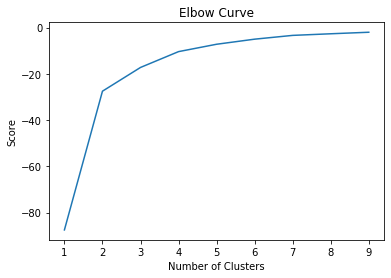

In [8]:
K_clusters = range(1,10) # testing a range of clusters
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude_start']]
X_axis = df[['longitude_start']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# plot to see what the best number of clusters would be
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeansX = KMeans(n_clusters = 8) # run KMeans on start coordinates with 8 clusters

kmeansX.fit(X) # compute k means

X['cluster_label'] = kmeansX.fit_predict(X) # create new column with label for the clusters 

centers = kmeansX.cluster_centers_

labelX = kmeansX.fit_predict(X) # labels of the points for kmeansX for plotting

X.head(10)

,latitude_start,longitude_start,cluster_label
0,41.896910,-87.621743,6
1,41.926277,-87.630834,5
2,41.912202,-87.634664,5
3,41.925602,-87.653708,2
4,41.882664,-87.632530,6
5,41.936253,-87.653566,2
6,41.962391,-87.684146,0
7,41.936497,-87.647539,2
8,41.884163,-87.629635,6
9,41.935733,-87.663576,2


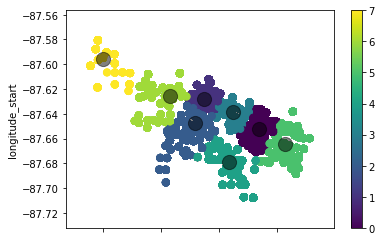

In [10]:
X.plot.scatter(x = 'latitude_start', y = 'longitude_start', c=labelX, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [11]:
kmeansY = KMeans(n_clusters = 8) # run KMeans on start coordinates with 8 clusters

kmeansY.fit(Y) # compute k means

Y['cluster_label'] = kmeansY.fit_predict(Y) # create new column with label for the clusters 

centers = kmeansY.cluster_centers_

labelY = kmeansY.fit_predict(Y) # labels of the points for kmeansX for plotting

Y.head(10)

,latitude_end,longitude_end,cluster_label
0,41.893843,-87.641851,4
1,41.978353,-87.659753,3
2,41.896544,-87.630931,4
3,41.929546,-87.643118,0
4,41.878948,-87.639750,1
5,41.932500,-87.652681,0
6,41.961670,-87.654640,3
7,41.929546,-87.643118,0
8,41.877749,-87.649633,5
9,41.943739,-87.664020,3


In [12]:
X.plot.scatter(x = 'longitude_end', y = 'latitude_end', c=labelY, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

KeyError: 'longitude_end'